In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
#load dataset
data = pd.read_csv('Bank Customer Churn Dataset.csv')
data

customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1              1         101348.88      1  
1                   1            0              1         112542.58      0  
2                   3            1              0         113931.57      1  
3                   2            0              0          93826.63      0  
4                   1            1              1          79084.10      0  
...               ...          ...            ...               ...    ...  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0  

[10000 rows x 12 columns]

In [3]:
#cek jumlah data dan kolomnya
data.shape

(10000, 12)

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["country"]=le.fit_transform(data["country"])
data["gender"]=le.fit_transform(data["gender"])
data

customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619        0       0   42       2       0.00   
1        15647311           608        2       0   41       1   83807.86   
2        15619304           502        0       0   42       8  159660.80   
3        15701354           699        0       0   39       1       0.00   
4        15737888           850        2       0   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771        0       1   39       5       0.00   
9996     15569892           516        0       1   35      10   57369.61   
9997     15584532           709        0       0   36       7       0.00   
9998     15682355           772        1       1   42       3   75075.31   
9999     15628319           792        0       0   28       4  130142.79   

      products_number  credit_card  active_member  estimated_salary  churn  
0                   1            1              1         101348.88      1  
1                   1            0              1         112542.58      0  
2                   3            1              0         113931.57      1  
3                   2            0              0          93826.63      0  
4                   1            1              1          79084.10      0  
...               ...          ...            ...               ...    ...  
9995                2            1              0          96270.64      0  
9996                1            1              1         101699.77      0  
9997                1            0              1          42085.58      1  
9998                2            1              0          92888.52      1  
9999                1            1              0          38190.78      0  

[10000 rows x 12 columns]

In [5]:
data["churn"].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

In [6]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [7]:
x

array([[1.5634602e+07, 6.1900000e+02, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [1.5647311e+07, 6.0800000e+02, 2.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.5619304e+07, 5.0200000e+02, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [1.5584532e+07, 7.0900000e+02, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [1.5682355e+07, 7.7200000e+02, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.5628319e+07, 7.9200000e+02, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [8]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

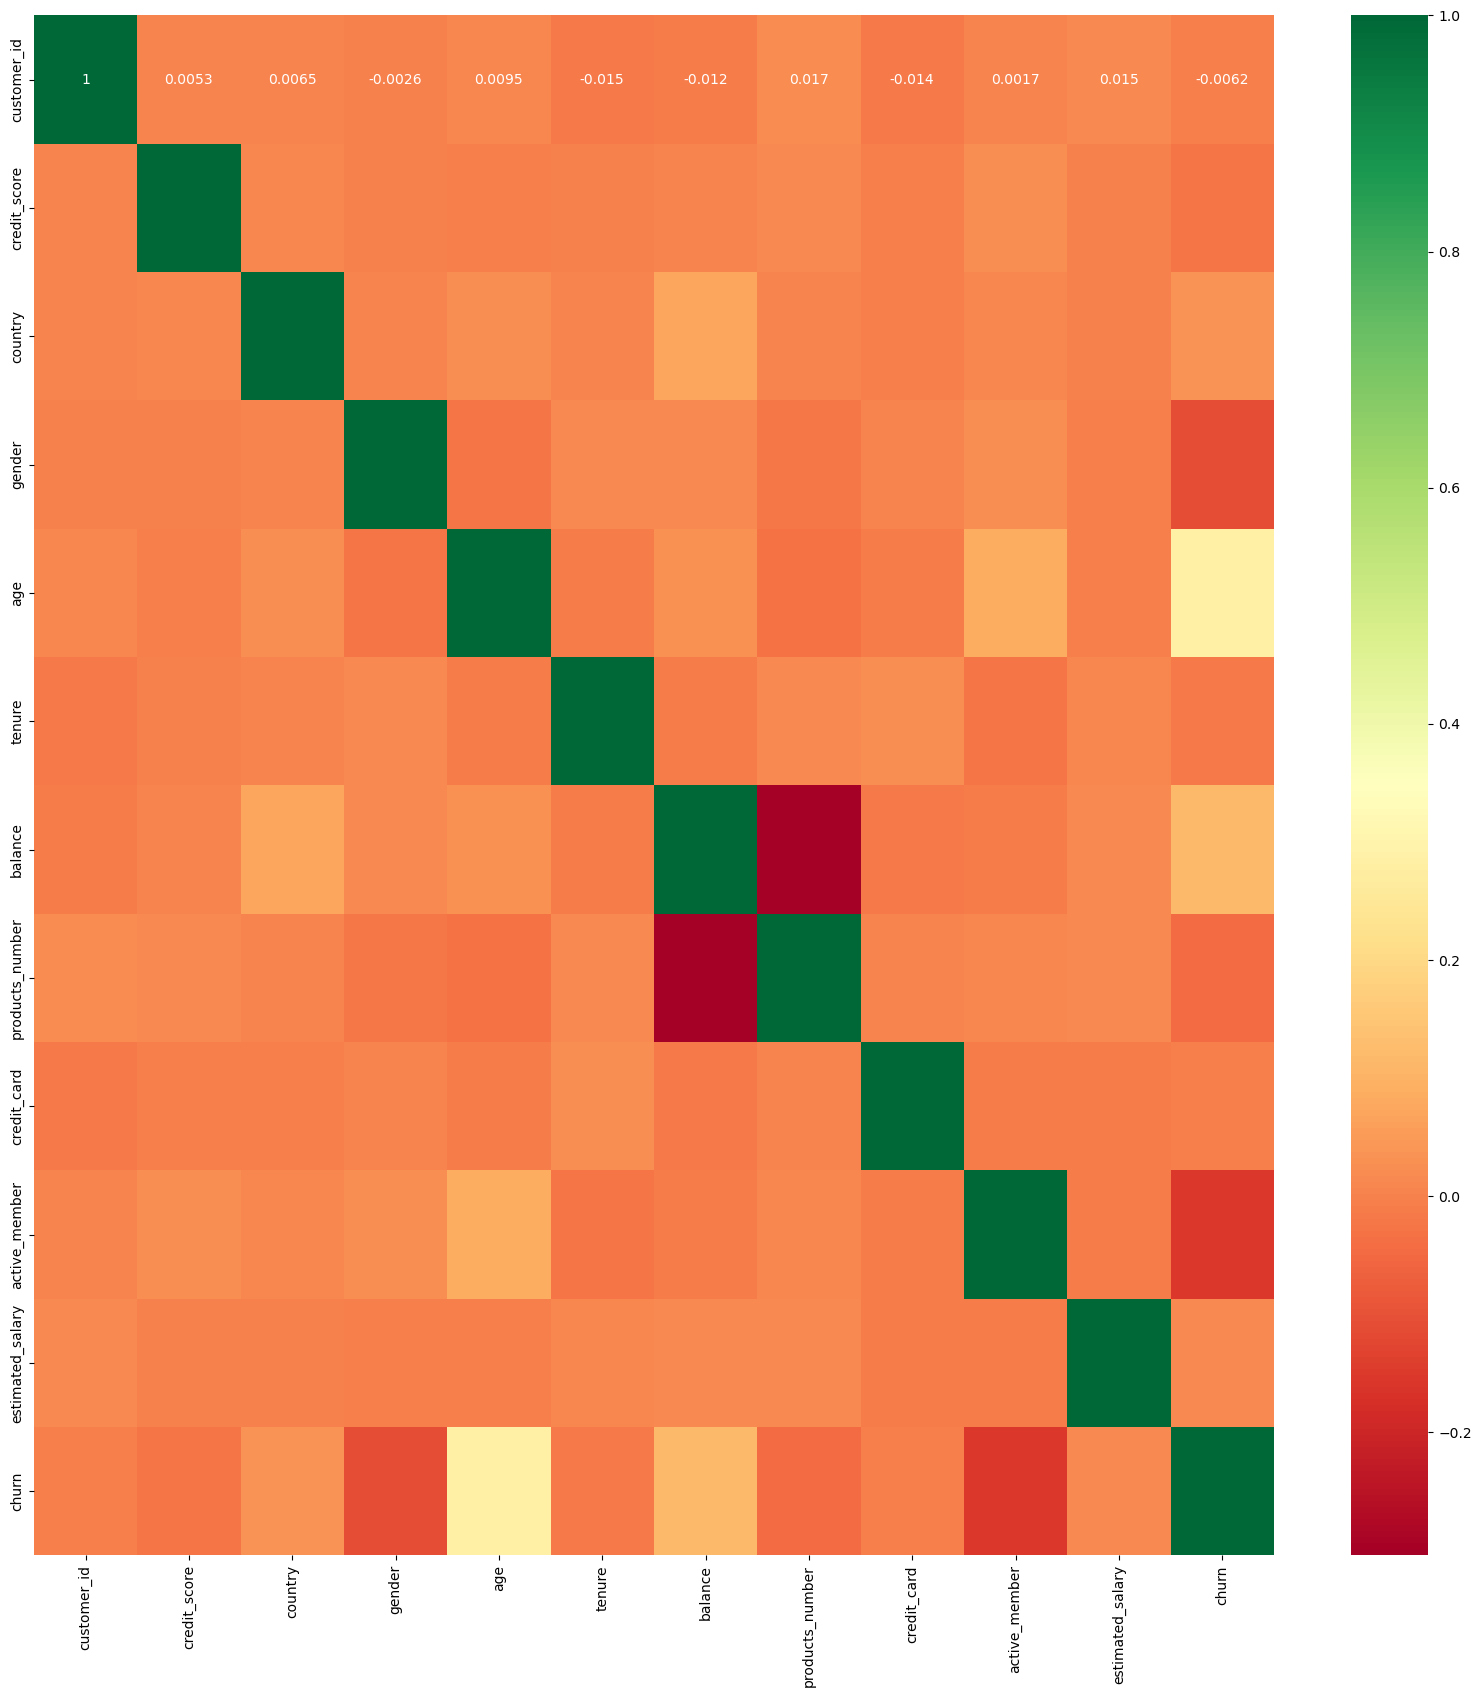

In [9]:
#Korelasi menggunakan heatmap
import seaborn as sns 

korelasi = data.corr()
features = korelasi.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data[features].corr(),annot=True,cmap="RdYlGn")

In [10]:
data.corr()

customer_id  credit_score   country    gender       age  \
customer_id          1.000000      0.005308  0.006516 -0.002641  0.009497   
credit_score         0.005308      1.000000  0.007888 -0.002857 -0.003965   
country              0.006516      0.007888  1.000000  0.004719  0.022812   
gender              -0.002641     -0.002857  0.004719  1.000000 -0.027544   
age                  0.009497     -0.003965  0.022812 -0.027544  1.000000   
tenure              -0.014883      0.000842  0.003739  0.014733 -0.009997   
balance             -0.012419      0.006268  0.069408  0.012087  0.028308   
products_number      0.016972      0.012238  0.003972 -0.021859 -0.030680   
credit_card         -0.014025     -0.005458 -0.008523  0.005766 -0.011721   
active_member        0.001665      0.025651  0.006724  0.022544  0.085472   
estimated_salary     0.015271     -0.001384 -0.001369 -0.008112 -0.007201   
churn               -0.006248     -0.027094  0.035943 -0.106512  0.285323   

                    tenure   balance  products_number  credit_card  \
customer_id      -0.014883 -0.012419         0.016972    -0.014025   
credit_score      0.000842  0.006268         0.012238    -0.005458   
country           0.003739  0.069408         0.003972    -0.008523   
gender            0.014733  0.012087        -0.021859     0.005766   
age              -0.009997  0.028308        -0.030680    -0.011721   
tenure            1.000000 -0.012254         0.013444     0.022583   
balance          -0.012254  1.000000        -0.304180    -0.014858   
products_number   0.013444 -0.304180         1.000000     0.003183   
credit_card       0.022583 -0.014858         0.003183     1.000000   
active_member    -0.028362 -0.010084         0.009612    -0.011866   
estimated_salary  0.007784  0.012797         0.014204    -0.009933   
churn            -0.014001  0.118533        -0.047820    -0.007138   

                  active_member  estimated_salary     churn  
customer_id            0.001665          0.015271 -0.006248  
credit_score           0.025651         -0.001384 -0.027094  
country                0.006724         -0.001369  0.035943  
gender                 0.022544         -0.008112 -0.106512  
age                    0.085472         -0.007201  0.285323  
tenure                -0.028362          0.007784 -0.014001  
balance               -0.010084          0.012797  0.118533  
products_number        0.009612          0.014204 -0.047820  
credit_card           -0.011866         -0.009933 -0.007138  
active_member          1.000000         -0.011421 -0.156128  
estimated_salary      -0.011421          1.000000  0.012097  
churn                 -0.156128          0.012097  1.000000

In [11]:
#statistika dasar
data.describe()

customer_id  credit_score       country        gender           age  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000  10000.000000   
mean   1.569094e+07    650.528800      0.746300      0.545700     38.921800   
std    7.193619e+04     96.653299      0.827529      0.497932     10.487806   
min    1.556570e+07    350.000000      0.000000      0.000000     18.000000   
25%    1.562853e+07    584.000000      0.000000      0.000000     32.000000   
50%    1.569074e+07    652.000000      0.000000      1.000000     37.000000   
75%    1.575323e+07    718.000000      1.000000      1.000000     44.000000   
max    1.581569e+07    850.000000      2.000000      1.000000     92.000000   

             tenure        balance  products_number  credit_card  \
count  10000.000000   10000.000000     10000.000000  10000.00000   
mean       5.012800   76485.889288         1.530200      0.70550   
std        2.892174   62397.405202         0.581654      0.45584   
min        0.000000       0.000000         1.000000      0.00000   
25%        3.000000       0.000000         1.000000      0.00000   
50%        5.000000   97198.540000         1.000000      1.00000   
75%        7.000000  127644.240000         2.000000      1.00000   
max       10.000000  250898.090000         4.000000      1.00000   

       active_member  estimated_salary         churn  
count   10000.000000      10000.000000  10000.000000  
mean        0.515100     100090.239881      0.203700  
std         0.499797      57510.492818      0.402769  
min         0.000000         11.580000      0.000000  
25%         0.000000      51002.110000      0.000000  
50%         1.000000     100193.915000      0.000000  
75%         1.000000     149388.247500      0.000000  
max         1.000000     199992.480000      1.000000

In [12]:
#checking skewness
BankCustomerChurnDataset_true_count =len(data.loc[data['churn']==1])
BankCustomerChurnDataset_false_count = len(data.loc[data['churn']==0])
(BankCustomerChurnDataset_true_count,BankCustomerChurnDataset_false_count)

(2037, 7963)

In [13]:
#view
(BankCustomerChurnDataset_true_count,BankCustomerChurnDataset_false_count)

(2037, 7963)

In [14]:
#Missing value
print('total number of rows : {0}'.format(data.shape[0]))
print('total number of columns : {0}'.format(data.shape[1]))

total number of rows : 10000
total number of columns : 12


In [15]:
print('Banyak baris nilai nol untuk customer_id :{0}'.format(len(data.loc[data['customer_id']==0])))
print('Banyak baris nilai nol untuk credit_score :{0}'.format(len(data.loc[data['credit_score']==0])))
print('Banyak baris nilai nol untuk country :{0}'.format(len(data.loc[data['country']==0])))
print('Banyak baris nilai nol untuk gender :{0}'.format(len(data.loc[data['gender']==0])))
print('Banyak baris nilai nol untuk age :{0}'.format(len(data.loc[data['age']==0])))
print('Banyak baris nilai nol untuk tenure :{0}'.format(len(data.loc[data['tenure']==0])))
print('Banyak baris nilai nol untuk balance :{0}'.format(len(data.loc[data['balance']==0])))
print('Banyak baris nilai nol untuk products_number :{0}'.format(len(data.loc[data['products_number']==0])))
print('Banyak baris nilai nol untuk credit_card :{0}'.format(len(data.loc[data['credit_card']==0])))
print('Banyak baris nilai nol untuk active_member :{0}'.format(len(data.loc[data['active_member']==0])))
print('Banyak baris nilai nol untuk estimated_salary:{0}'.format(len(data.loc[data['estimated_salary']==0])))

Banyak baris nilai nol untuk customer_id :0
Banyak baris nilai nol untuk credit_score :0
Banyak baris nilai nol untuk country :5014
Banyak baris nilai nol untuk gender :4543
Banyak baris nilai nol untuk age :0
Banyak baris nilai nol untuk tenure :413
Banyak baris nilai nol untuk balance :3617
Banyak baris nilai nol untuk products_number :0
Banyak baris nilai nol untuk credit_card :2945
Banyak baris nilai nol untuk active_member :4849
Banyak baris nilai nol untuk estimated_salary:0


In [16]:
data2 = data.copy()

In [58]:
#rata-rata
avg_country = data2['country'].mean()
avg_gender = data2['gender'].mean()
avg_tenure = data2['tenure'].mean()
avg_balance = data2['balance'].mean()
avg_credit_card = data2['credit_card'].mean()
avg_active_member = data2['active_member'].mean()

In [59]:
#now replace avg to columns
data2['country'].replace({0:avg_country},inplace=True)
data2['gender'].replace({0:avg_gender},inplace=True)
data2['tenure'].replace({0:avg_tenure},inplace=True)
data2['balance'].replace({0:avg_balance},inplace=True)
data2['credit_card'].replace({0:avg_credit_card},inplace=True)
data2['active_member'].replace({0:avg_active_member},inplace=True)

In [60]:
print('Banyak baris nilai nol untuk customer_id :{0}'.format(len(data2.loc[data2['customer_id']==0])))
print('Banyak baris nilai nol untuk credit_score :{0}'.format(len(data2.loc[data2['credit_score']==0])))
print('Banyak baris nilai nol untuk country :{0}'.format(len(data2.loc[data2['country']==0])))
print('Banyak baris nilai nol untuk gender :{0}'.format(len(data2.loc[data2['gender']==0])))
print('Banyak baris nilai nol untuk age :{0}'.format(len(data2.loc[data2['age']==0])))
print('Banyak baris nilai nol untuk tenure :{0}'.format(len(data2.loc[data2['tenure']==0])))
print('Banyak baris nilai nol untuk balance :{0}'.format(len(data2.loc[data2['balance']==0])))
print('Banyak baris nilai nol untuk products_number :{0}'.format(len(data2.loc[data2['products_number']==0])))
print('Banyak baris nilai nol untuk credit_card :{0}'.format(len(data2.loc[data2['credit_card']==0])))
print('Banyak baris nilai nol untuk active_member :{0}'.format(len(data2.loc[data2['active_member']==0])))
print('Banyak baris nilai nol untuk estimated_salary:{0}'.format(len(data2.loc[data2['estimated_salary']==0])))

Banyak baris nilai nol untuk customer_id :0
Banyak baris nilai nol untuk credit_score :0
Banyak baris nilai nol untuk country :0
Banyak baris nilai nol untuk gender :0
Banyak baris nilai nol untuk age :0
Banyak baris nilai nol untuk tenure :0
Banyak baris nilai nol untuk balance :0
Banyak baris nilai nol untuk products_number :0
Banyak baris nilai nol untuk credit_card :0
Banyak baris nilai nol untuk active_member :0
Banyak baris nilai nol untuk estimated_salary:0


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

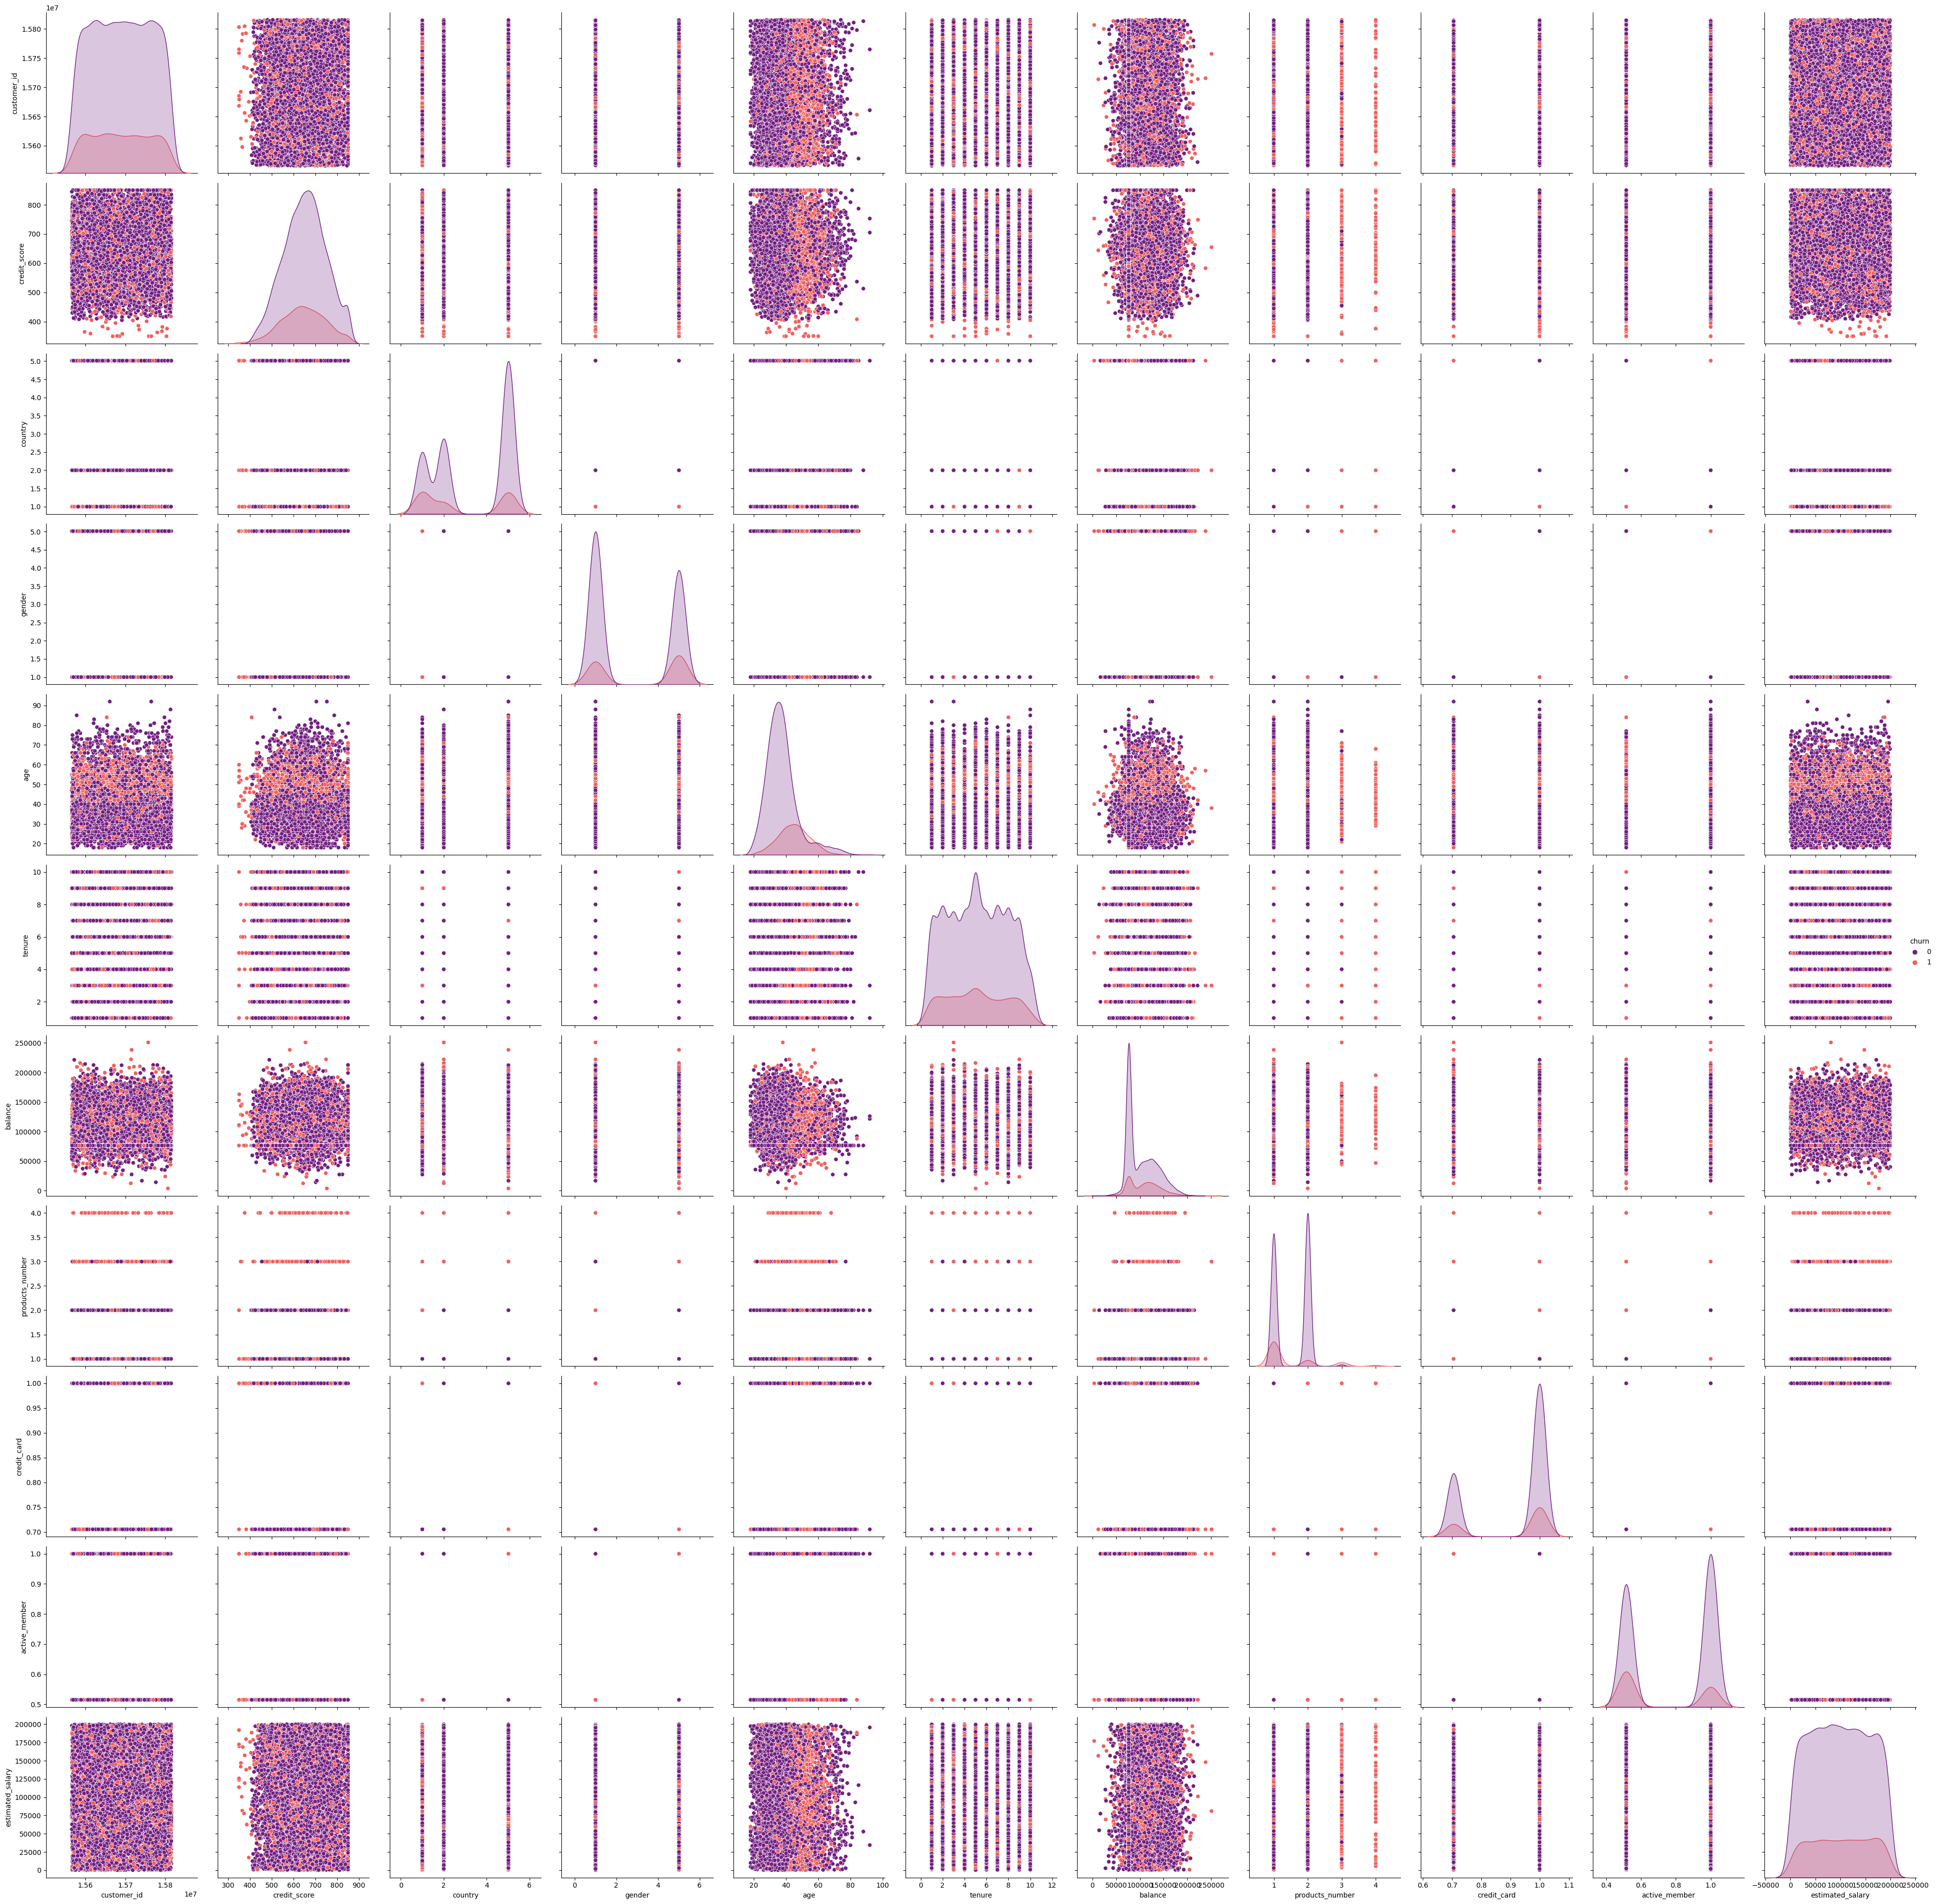

In [61]:
#make pairplot
sns.pairplot(data2,hue='churn',palette='magma',height=3.5)
plt.tight_layout()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

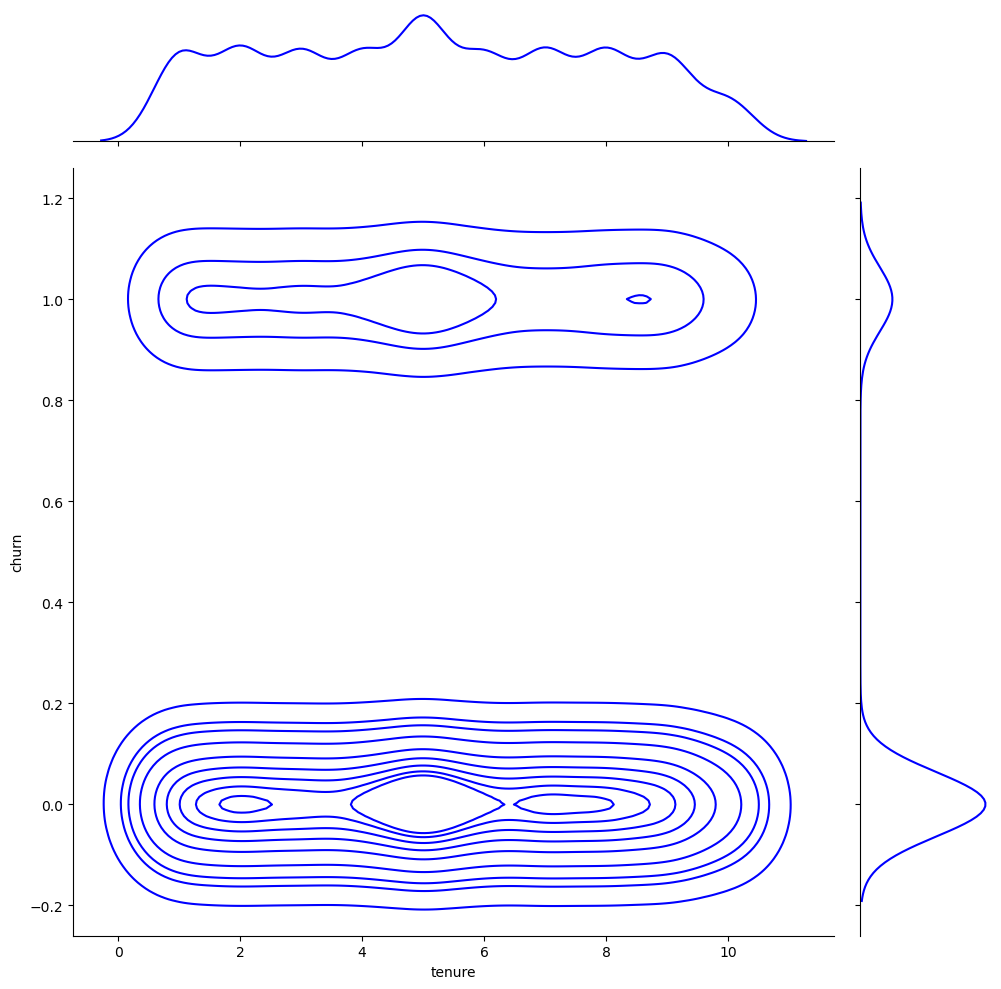

In [62]:
#joinplot
sns.jointplot(x='tenure',y='churn',data=data2,height=10,kind='kde',color='blue')

In [24]:
from sklearn.model_selection import  train_test_split

x =data2.drop('churn',axis=1)
y= data2['churn']

In [25]:
x

customer_id  credit_score  country  gender  age  tenure        balance  \
0        15634602           619   5.0128  5.0128   42     2.0   76485.889288   
1        15647311           608   2.0000  5.0128   41     1.0   83807.860000   
2        15619304           502   5.0128  5.0128   42     8.0  159660.800000   
3        15701354           699   5.0128  5.0128   39     1.0   76485.889288   
4        15737888           850   2.0000  5.0128   43     2.0  125510.820000   
...           ...           ...      ...     ...  ...     ...            ...   
9995     15606229           771   5.0128  1.0000   39     5.0   76485.889288   
9996     15569892           516   5.0128  1.0000   35    10.0   57369.610000   
9997     15584532           709   5.0128  5.0128   36     7.0   76485.889288   
9998     15682355           772   1.0000  1.0000   42     3.0   75075.310000   
9999     15628319           792   5.0128  5.0128   28     4.0  130142.790000   

      products_number  credit_card  active_member  estimated_salary  
0                   1       1.0000         1.0000         101348.88  
1                   1       0.7055         1.0000         112542.58  
2                   3       1.0000         0.5151         113931.57  
3                   2       0.7055         0.5151          93826.63  
4                   1       1.0000         1.0000          79084.10  
...               ...          ...            ...               ...  
9995                2       1.0000         0.5151          96270.64  
9996                1       1.0000         1.0000         101699.77  
9997                1       0.7055         1.0000          42085.58  
9998                2       1.0000         0.5151          92888.52  
9999                1       1.0000         0.5151          38190.78  

[10000 rows x 11 columns]

In [26]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [31]:
x_train

customer_id  credit_score  country  gender  age  tenure        balance  \
9254     15601116           686   5.0128  1.0000   32     6.0   76485.889288   
1561     15766374           632   1.0000  1.0000   42     4.0  119624.600000   
1670     15716994           559   2.0000  1.0000   24     3.0  114739.920000   
6087     15730759           561   5.0128  5.0128   27     9.0  135637.000000   
6669     15797900           517   5.0128  1.0000   56     9.0  142147.320000   
...           ...           ...      ...     ...  ...     ...            ...   
5734     15596647           768   5.0128  1.0000   54     8.0   69712.740000   
5191     15681075           682   5.0128  5.0128   58     1.0   76485.889288   
5390     15573851           735   5.0128  5.0128   38     1.0   76485.889288   
860      15807663           667   5.0128  1.0000   43     8.0  190227.460000   
7270     15706268           697   1.0000  1.0000   51     1.0  147910.300000   

      products_number  credit_card  active_member  estimated_salary  
9254                2       1.0000         1.0000         179093.26  
1561                2       1.0000         1.0000         195978.86  
1670                1       1.0000         0.5151          85891.02  
6087                1       1.0000         0.5151         153080.40  
6669                1       0.7055         0.5151          39488.04  
...               ...          ...            ...               ...  
5734                1       1.0000         1.0000          69381.05  
5191                1       1.0000         1.0000            706.50  
5390                3       0.7055         0.5151          92220.12  
860                 1       1.0000         0.5151          97508.04  
7270                1       1.0000         1.0000          53581.14  

[8000 rows x 11 columns]

In [32]:
x_train.shape

(8000, 11)

In [33]:
x_test

customer_id  credit_score  country  gender  age  tenure        balance  \
6252     15687492           596   1.0000  1.0000   32     3.0   96709.070000   
4684     15736963           623   5.0128  1.0000   43     1.0   76485.889288   
1731     15721730           601   2.0000  5.0128   44     4.0   76485.889288   
4742     15762134           506   1.0000  1.0000   59     8.0  119152.100000   
4521     15648898           560   2.0000  5.0128   27     7.0  124995.980000   
...           ...           ...      ...     ...  ...     ...            ...   
6412     15598982           602   1.0000  5.0128   53     5.0   98268.840000   
8285     15572631           609   5.0128  1.0000   25    10.0   76485.889288   
7853     15746674           730   5.0128  5.0128   47     7.0   76485.889288   
1095     15689081           692   5.0128  1.0000   29     4.0   76485.889288   
6929     15651627           628   1.0000  1.0000   39     1.0  115341.190000   

      products_number  credit_card  active_member  estimated_salary  
6252                2       0.7055         0.5151          41788.37  
4684                2       1.0000         1.0000         146379.30  
1731                2       1.0000         0.5151          58561.31  
4742                2       1.0000         1.0000         170679.74  
4521                1       1.0000         1.0000         114669.79  
...               ...          ...            ...               ...  
6412                1       0.7055         1.0000          45038.29  
8285                1       0.7055         1.0000         109895.16  
7853                1       1.0000         0.5151          33373.26  
1095                1       1.0000         0.5151          76755.99  
6929                1       1.0000         1.0000         107674.30  

[2000 rows x 11 columns]

In [34]:
y_train

9254    0
1561    0
1670    1
6087    1
6669    1
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: churn, Length: 8000, dtype: int64

In [54]:
from sklearn.naive_bayes import GaussianNB
GaussianNB_model = GaussianNB()
GaussianNB_model.fit(x_train, y_train)

GaussianNB()

In [55]:
y_pred4=g1.predict(x_test)
y_pred4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score
ac4=accuracy_score(y_test,y_pred4)*100
print(ac4)

79.05


In [57]:
import pickle

pickle.dump(GaussianNB_model,open('NaiveBayes.pkl','wb'))